# Data Preprocessing

In [1]:
import pandas as pd
import numpy as np

import pickle 

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Import Warnings
import warnings
warnings.filterwarnings("ignore")

## Game Names data

In [2]:
# Load games data
df = pd.read_json('../Data/steam/gamesdata.json')
df.head()

,publisher,genres,app_name,title,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,id,developer,sentiment,metascore
0,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",4.49,http://steamcommunity.com/app/761140/reviews/?...,[Single-player],4.99,False,761140.0,Kotoshiro,NaN,NaN
1,"Making Fun, Inc.","[Free to Play, Indie, RPG, Strategy]",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"[Free to Play, Strategy, Indie, RPG, Card Game...",NaN,http://steamcommunity.com/app/643980/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free To Play,False,643980.0,Secret Level SRL,Mostly Positive,NaN
2,Poolians.com,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,"[Free to Play, Simulation, Sports, Casual, Ind...",NaN,http://steamcommunity.com/app/670290/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free to Play,False,670290.0,Poolians.com,Mostly Positive,NaN
3,彼岸领域,"[Action, Adventure, Casual]",弹炸人2222,弹炸人2222,http://store.steampowered.com/app/767400/2222/,2017-12-07,"[Action, Adventure, Casual]",0.83,http://steamcommunity.com/app/767400/reviews/?...,[Single-player],0.99,False,767400.0,彼岸领域,NaN,NaN
4,NaN,NaN,Log Challenge,NaN,http://store.steampowered.com/app/773570/Log_C...,NaN,"[Action, Indie, Casual, Sports]",1.79,http://steamcommunity.com/app/773570/reviews/?...,"[Single-player, Full controller support, HTC V...",2.99,False,773570.0,NaN,NaN,NaN


In [4]:
# Get relevant columns
gamenames = df[['title', 'id']]
gamenames.head()

,title,id
0,Lost Summoner Kitty,761140.0
1,Ironbound,643980.0
2,Real Pool 3D - Poolians,670290.0
3,弹炸人2222,767400.0
4,NaN,773570.0


In [5]:
# Save as csv
gamenames.to_csv('gamenames.csv')

## User items Data

In [6]:
# Load users/items data
useritems = pd.read_json('../Data/steam/data.json')
useritems.head()

,user_id,items_count,steam_id,user_url,items
0,76561197970982479,277,76561197970982480,http://steamcommunity.com/profiles/76561197970...,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
1,js41637,888,76561198035864384,http://steamcommunity.com/id/js41637,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
2,evcentric,137,76561198007712560,http://steamcommunity.com/id/evcentric,"[{'item_id': '1200', 'item_name': 'Red Orchest..."
3,Riot-Punch,328,76561197963445856,http://steamcommunity.com/id/Riot-Punch,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
4,doctr,541,76561198002099488,http://steamcommunity.com/id/doctr,"[{'item_id': '300', 'item_name': 'Day of Defea..."


In [16]:
# Look at number of users
len(useritems)

63519

In [17]:
# Describe items count feature
useritems['items_count'].describe()

count    63519.000000
mean        80.861569
std        137.818776
min          5.000000
25%         21.000000
50%         48.000000
75%         96.000000
max       7762.000000
Name: items_count, dtype: float64

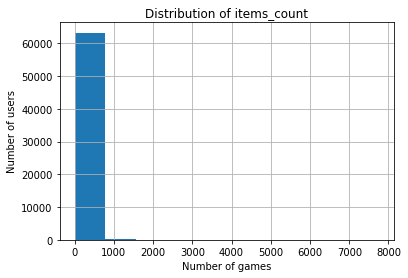

In [19]:
useritems['items_count'].hist()
plt.xlabel('Number of games')
plt.ylabel('Number of users')
plt.title('Distribution of items_count')
plt.show()

In [15]:
# Take entries where user owns 5 or more games
useritems = useritems[useritems['items_count'] >= 5]

# Get count
len(useritems)

63519

In [26]:
# Downsample - take 10% of users
useritemsample = useritems.sample(frac = 0.1)
# Reset index
useritemsample = useritemsample.reset_index(drop = True)
# Check
useritemsample.head()

,user_id,items_count,steam_id,user_url,items
0,SOPHIAROSE,9,76561198079494448,http://steamcommunity.com/id/SOPHIAROSE,"[{'item_id': '224260', 'item_name': 'No More R..."
1,76561198010963501,46,76561198010963504,http://steamcommunity.com/profiles/76561198010...,"[{'item_id': '240', 'item_name': 'Counter-Stri..."
2,76561198071101884,38,76561198071101888,http://steamcommunity.com/profiles/76561198071...,"[{'item_id': '12120', 'item_name': 'Grand Thef..."
3,76561198047680361,35,76561198047680368,http://steamcommunity.com/profiles/76561198047...,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
4,Spazzykins,151,76561198070265168,http://steamcommunity.com/id/Spazzykins,"[{'item_id': '4000', 'item_name': 'Garry's Mod..."


In [30]:
# Preview items column values for first user
# Restrict to first 2 items in dictionary

useritemsample['items'][0][0:2]

[{'item_id': '224260',
  'item_name': 'No More Room in Hell',
  'playtime_forever': 1926,
  'playtime_2weeks': 0},
 {'item_id': '239660',
  'item_name': 'Soldier Front 2',
  'playtime_forever': 0,
  'playtime_2weeks': 0}]

We will look to extract the `item_id`s into a seperate column. For now we will leave the playtime data but look to incorporate it later.

In [32]:
# Get all item_id for first user
gameids = [useritemsample['items'][0][index]['item_id'] for index, _ in enumerate(useritemsample['items'][0])]
# Show first 10 item ids
gameids[:10]

['224260',
 '239660',
 '230410',
 '241640',
 '262410',
 '270170',
 '291480',
 '314280',
 '273110']

In [33]:
# Create column with item ids
useritemsample['item_id'] = useritemsample['items'].apply(lambda x: [x [index]['item_id'] for index, _ in enumerate(x)])
useritemsample.head()

,user_id,items_count,steam_id,user_url,items,item_id
0,SOPHIAROSE,9,76561198079494448,http://steamcommunity.com/id/SOPHIAROSE,"[{'item_id': '224260', 'item_name': 'No More R...","[224260, 239660, 230410, 241640, 262410, 27017..."
1,76561198010963501,46,76561198010963504,http://steamcommunity.com/profiles/76561198010...,"[{'item_id': '240', 'item_name': 'Counter-Stri...","[240, 4000, 15620, 24860, 24960, 33930, 219540..."
2,76561198071101884,38,76561198071101888,http://steamcommunity.com/profiles/76561198071...,"[{'item_id': '12120', 'item_name': 'Grand Thef...","[12120, 12250, 17390, 17440, 11590, 24720, 201..."
3,76561198047680361,35,76561198047680368,http://steamcommunity.com/profiles/76561198047...,"[{'item_id': '10', 'item_name': 'Counter-Strik...","[10, 20, 30, 40, 50, 60, 70, 80, 100, 130, 220..."
4,Spazzykins,151,76561198070265168,http://steamcommunity.com/id/Spazzykins,"[{'item_id': '4000', 'item_name': 'Garry's Mod...","[4000, 6910, 2280, 220, 320, 340, 360, 380, 40..."


In [34]:
# Add a column with substitute user_id
useritemsample['uid'] = np.arange(len(useritemsample))

# Take relevant columns
useritemsample = useritemsample[['uid', 'item_id']]

# Check
useritemsample.head()

,uid,item_id
0,0,"[224260, 239660, 230410, 241640, 262410, 27017..."
1,1,"[240, 4000, 15620, 24860, 24960, 33930, 219540..."
2,2,"[12120, 12250, 17390, 17440, 11590, 24720, 201..."
3,3,"[10, 20, 30, 40, 50, 60, 70, 80, 100, 130, 220..."
4,4,"[4000, 6910, 2280, 220, 320, 340, 360, 380, 40..."


In [35]:
# Explode item_ids into seperate rows
lst_col = 'item_id'
useritemsample = pd.DataFrame({col:np.repeat(useritemsample[col].values, useritemsample[lst_col].str.len())
                              for col in useritemsample.columns.difference([lst_col])
                        }).assign(**{lst_col:np.concatenate(useritemsample[lst_col].values)})[useritemsample.columns.tolist()]
# Check
useritemsample.head()

,uid,item_id
0,0,224260
1,0,239660
2,0,230410
3,0,241640
4,0,262410


In [36]:
# Add binary owned column
useritemsample['owned'] = np.ones(shape = useritemsample.shape[0])

# Check
useritemsample.head()

,uid,item_id,owned
0,0,224260,1.0
1,0,239660,1.0
2,0,230410,1.0
3,0,241640,1.0
4,0,262410,1.0


In [38]:
# Get size
len(useritemsample)

521500

In [39]:
# Pivot table
useritemspivot = useritemsample.pivot_table(index = ['uid'], columns = ['item_id'], values = 'owned')
useritemspivot.head()

item_id,10,100,10000,1002,10080,10090,100970,100980,10100,10110,...,9970,99700,9980,99810,99830,99890,9990,99900,99910,99920
uid,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
# Fill nan with 0
useritemspivot = useritemspivot.fillna(0)
useritemspivot.head()

item_id,10,100,10000,1002,10080,10090,100970,100980,10100,10110,...,9970,99700,9980,99810,99830,99890,9990,99900,99910,99920
uid,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
useritemspivot.to_csv('useritemssamplepivot.csv')

In [43]:
uidf = pd.read_csv('useritemssamplepivot.csv')
uidf.head()

,uid,10,100,10000,1002,10080,10090,100970,100980,10100,...,9970,99700,9980,99810,99830,99890,9990,99900,99910,99920
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
# Get list of column names
cols = list(uidf.columns)[1:]

# Use melt to unpivot dataframe
useritemsmelt = pd.melt(uidf, id_vars = ['uid'], value_vars=cols)

# Check
useritemsmelt.head()

,uid,variable,value
0,0,10,0.0
1,1,10,0.0
2,2,10,0.0
3,3,10,1.0
4,4,10,0.0


In [45]:
len(useritemsmelt)

57511008

In [46]:
# Save as csv
useritemsmelt.to_csv('useritemsmelt.csv')